# Task 1

In [8]:
from function_approximation import *

### 1. First part
Approximate linear function in dataset `linear_function_data.txt`

In [9]:
linear_data_path = "../data/linear_function_data.txt"
A, residuals, rank, singvals = approx_lin_func(linear_data_path)

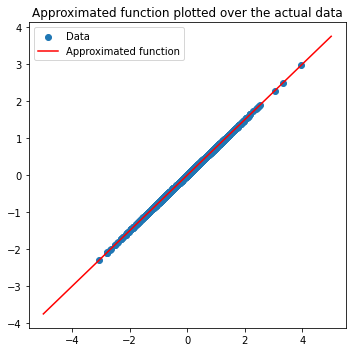

In [10]:
# plot approximated function over the linear data
plot_func_over_data(lstsqr_sol=A, data=linear_data_path, linear=True)

The function computed through least squares approximates well this data.

### 2. Second part
Approximate non-linear function in dataset `nonlinear_function_data.txt`
with a linear function.

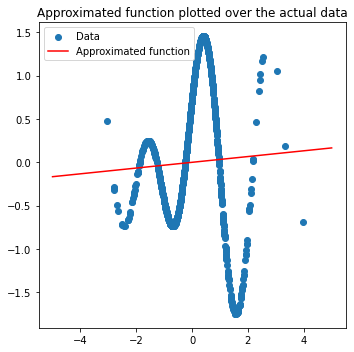

In [11]:
# approximate with a linear function
nonlinear_data_path = "../data/nonlinear_function_data.txt"
A, residuals, rank, singvals = approx_lin_func(nonlinear_data_path)

# plot function over data
plot_func_over_data(lstsqr_sol=A, data=nonlinear_data_path, linear=True)

Approximating non-linear data with a linear function, obviously, does not work well.

### 3. Third part
Approximate non-linear function in dataset `nonlinear_function_data.txt`
with a combination of radial basis functions.<br>
Try different values for the number of basis and the $\epsilon$ parameter.

In [12]:
# read the data
points, targets = get_points_and_targets(nonlinear_data_path)

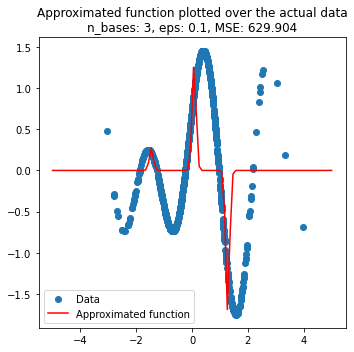

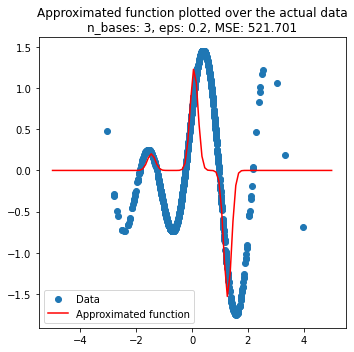

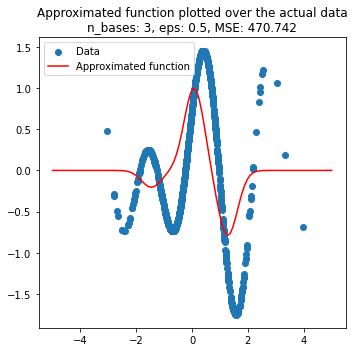

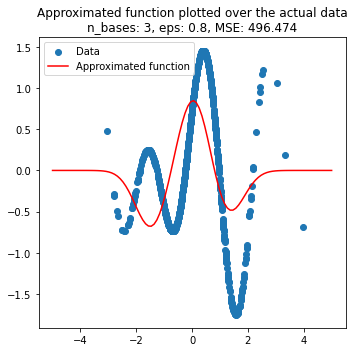

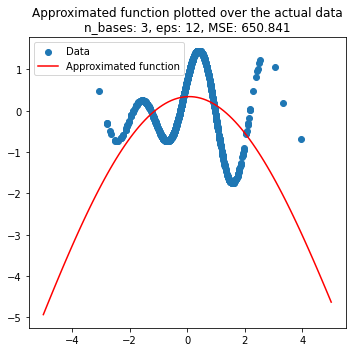

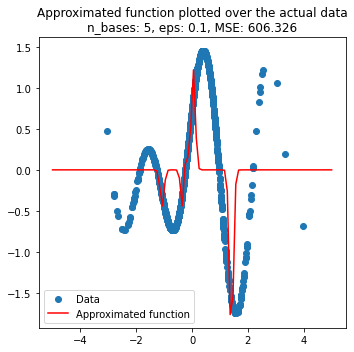

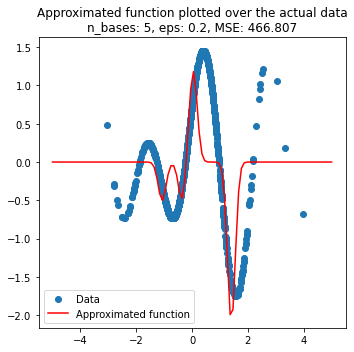

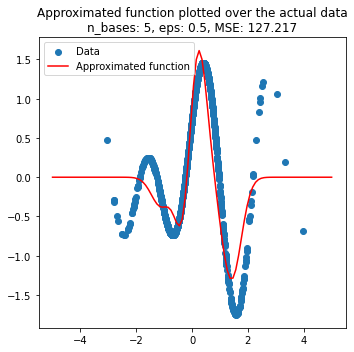

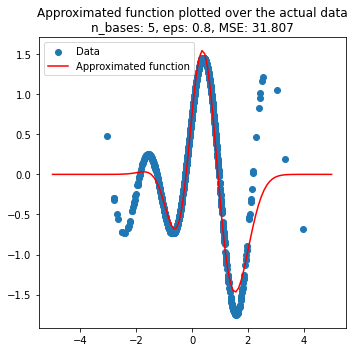

IndexError: index 0 is out of bounds for axis 0 with size 0

In [13]:
# try to approximate the data with different number of bases and values of eps, then plot the approximation and the data
n_bases_list = (3, 5, 8, 10)
eps_list = (.1, .2, .5, .8, 12)
for n_bases in n_bases_list:
    # use the same center points with all the different values of eps
    centers = np.random.choice(points.ravel(), replace=False, size=n_bases)
    for eps in eps_list:
        # note: the second return value is MSE and not the residuals because the targets are a 1-dimensional numpy ndarray,
        # so np.linalg.lstqr used within approx_nonlin_func already returns the mean. It's a list with 1 value
        C, mse, _, _, centers, eps, _ = approx_nonlin_func(nonlinear_data_path, n_bases=n_bases, eps=eps, centers=centers)
        plot_func_over_data(lstsqr_sol=C, data=nonlinear_data_path, linear=False, centers=centers, eps=eps, MSE=round(mse[0], 3))

Analyzing $\texttt{eps}$:
- if $\texttt{eps}$ is too small, it creates peaks that are not smooth enough to follow the behavior of the actual data
- if $\texttt{eps}$ is too big, it is even too smooth and it looks like it's not "reactive" enough to follow the behavior of the data

Analyzing $\texttt{n_bases}$:
- if $\texttt{n_bases}$ is too small, we have too few basis functions in order for their linear combination to properly approximate the data
- if $\texttt{n_bases}$ is too big, this does not represent a problem for the quality of the approximation --> more basis functions = more "freedom"

Now let's try to approximate the **linear** data using the radial basis functions:

In [ ]:
C, residuals, rank, singvals, centers, eps = approx_nonlin_func(linear_data_path, n_bases=10, eps=0.1)
plot_func_over_data(lstsqr_sol=C, data=linear_data_path, linear=False, centers=centers, eps=eps)

In [ ]:
C, residuals, rank, singvals, centers, eps = approx_nonlin_func(linear_data_path, n_bases=1000, eps=0.6)
plot_func_over_data(lstsqr_sol=C, data=linear_data_path, linear=False, centers=centers, eps=eps)

Using the radial basis functions to approximate linear data is not a good idea
because, to reach a semi-decent approximation we should use a number of basis functions
equal to the number of points (more is not possible of course) and a large eps.<br>
Furthermore, the linear approximation works better anyway, and it's also simpler.
